Installing ultralytics

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

Verify Installation

In [ ]:
!yolo

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

    Arguments received: ['yolo']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'segment', 'classify', 'pose', 'detect', 'obb'})
                MODE (required) is one of frozenset({'benchmark', 'export', 'val', 'predict', 'train', 'track'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10

In [ ]:
import zipfile
import os

zip_file_path = '/content/trainingData.zip'

output_dir = '/content'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

Training Model

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolo11n.pt')
# Train the model
results = model.train(data='/content/data.yaml', epochs=200, imgsz=640, patience=25, batch=32,plots=True)

model.save('best_yolo_model.pt')

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=200, time=None, patience=25, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 133MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train/labels... 6800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6800/6800 [00:05<00:00, 1252.33it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/val/labels... 1701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1701/1701 [00:02<00:00, 789.45it/s]


val: New cache created: /content/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      11.5G      1.741      1.814      1.348       1287        640: 100%|██████████| 213/213 [00:36<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:13<00:00,  2.02it/s]


                   all       1701      99816      0.844      0.894      0.892      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      10.9G       1.28     0.8008      1.098       1542        640: 100%|██████████| 213/213 [00:34<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:12<00:00,  2.21it/s]


                   all       1701      99816      0.939      0.943       0.96      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      12.7G      1.195     0.7316      1.053       1445        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:12<00:00,  2.21it/s]


                   all       1701      99816      0.953      0.953       0.97      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      11.4G      1.082     0.6471      1.005       1288        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.58it/s]


                   all       1701      99816      0.962      0.954      0.984      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      10.1G      0.967     0.5804     0.9577       1609        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.98it/s]


                   all       1701      99816      0.967      0.957      0.988      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      14.2G      0.905     0.5372     0.9351       1223        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.96it/s]


                   all       1701      99816      0.974      0.956      0.987      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      23.4G      0.855     0.5089     0.9196       1757        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.08it/s]


                   all       1701      99816      0.979       0.98      0.993      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      13.9G     0.8111     0.4838     0.9061       1399        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.83it/s]


                   all       1701      99816      0.969      0.964      0.981      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      11.9G     0.7778     0.4668     0.8963       1184        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.14it/s]


                   all       1701      99816      0.978      0.978      0.994      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200        14G      0.753     0.4476     0.8893       1434        640: 100%|██████████| 213/213 [00:33<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.14it/s]


                   all       1701      99816      0.994      0.994      0.994      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      12.4G     0.7205     0.4344     0.8817       1356        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.14it/s]


                   all       1701      99816      0.994      0.993      0.994      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      13.4G     0.7104     0.4221     0.8768        987        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.20it/s]


                   all       1701      99816      0.996      0.994      0.994      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      11.9G     0.6854     0.4127     0.8709       1243        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.19it/s]


                   all       1701      99816      0.996      0.995      0.994      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      12.2G      0.673     0.4079     0.8664        964        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.27it/s]


                   all       1701      99816      0.986      0.983      0.994      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      10.8G     0.6494     0.3908     0.8622       1174        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.24it/s]


                   all       1701      99816      0.997      0.997      0.994      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200        11G     0.6475     0.3908     0.8602       1450        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.32it/s]


                   all       1701      99816      0.993      0.992      0.994      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      9.55G     0.6331      0.384     0.8564       1395        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.33it/s]


                   all       1701      99816      0.988      0.988      0.994      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      14.6G     0.6204     0.3735     0.8539       1593        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.32it/s]


                   all       1701      99816      0.997      0.997      0.994      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      9.61G     0.6099     0.3709     0.8515       1802        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.46it/s]


                   all       1701      99816       0.99      0.989      0.994      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      11.4G     0.6016     0.3648     0.8488       1763        640: 100%|██████████| 213/213 [00:33<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.45it/s]


                   all       1701      99816      0.993      0.994      0.994      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      11.1G     0.5928     0.3591     0.8462       1440        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.52it/s]


                   all       1701      99816      0.997      0.996      0.994      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      11.1G     0.5807     0.3535     0.8452       1641        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.54it/s]


                   all       1701      99816      0.996      0.996      0.994       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      13.5G     0.5753     0.3549     0.8439       1189        640: 100%|██████████| 213/213 [00:32<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]


                   all       1701      99816      0.997      0.997      0.995      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      12.8G     0.5669      0.349     0.8417       1706        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.57it/s]


                   all       1701      99816      0.997      0.997      0.994      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      11.1G     0.5642     0.3427     0.8401       1079        640: 100%|██████████| 213/213 [00:32<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.997      0.995      0.994      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      16.2G     0.5546     0.3388     0.8378        970        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.53it/s]


                   all       1701      99816      0.997      0.996      0.994      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      12.4G     0.5549      0.337     0.8375       1662        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]


                   all       1701      99816      0.998      0.998      0.994      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      13.8G     0.5459     0.3324     0.8363       1393        640: 100%|██████████| 213/213 [00:33<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.54it/s]


                   all       1701      99816      0.997      0.996      0.994      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      16.4G     0.5421     0.3323     0.8333       1407        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.56it/s]


                   all       1701      99816      0.998      0.998      0.994      0.941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      11.4G      0.535     0.3292     0.8348       1509        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.996      0.997      0.994      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      15.4G     0.5247     0.3197     0.8307       1106        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]


                   all       1701      99816      0.998      0.998      0.994      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      15.1G     0.5232     0.3229     0.8304       1555        640: 100%|██████████| 213/213 [00:33<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.56it/s]


                   all       1701      99816      0.996      0.997      0.994      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200        11G      0.515     0.3163     0.8298       1281        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.53it/s]


                   all       1701      99816      0.998      0.998      0.994      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      12.7G     0.5135     0.3154     0.8288        887        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]


                   all       1701      99816      0.987      0.987      0.994      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      9.24G     0.5072      0.311     0.8289       1034        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.56it/s]


                   all       1701      99816      0.997      0.996      0.994      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      14.4G     0.5051     0.3138     0.8278       1331        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]


                   all       1701      99816      0.998      0.998      0.994       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      13.4G     0.5062     0.3097     0.8267       1352        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.57it/s]


                   all       1701      99816      0.998      0.998      0.994      0.952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      14.5G     0.4973     0.3068     0.8253       1194        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]


                   all       1701      99816      0.998      0.998      0.994       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      10.3G     0.4904     0.3033     0.8259       1263        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]


                   all       1701      99816      0.998      0.998      0.994      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      13.9G      0.488     0.3041     0.8236       1255        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.998      0.998      0.994      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      12.8G     0.4938     0.3036     0.8242       1494        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.998      0.994      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      11.7G     0.4823     0.2973     0.8228       1283        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.57it/s]


                   all       1701      99816      0.998      0.998      0.994      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200        12G     0.4814     0.2978     0.8222        949        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.56it/s]

                   all       1701      99816      0.998      0.998      0.994      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200        16G      0.479      0.298     0.8219       1398        640: 100%|██████████| 213/213 [00:33<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]


                   all       1701      99816      0.998      0.998      0.995      0.952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      11.8G     0.4753     0.2921     0.8209       1693        640: 100%|██████████| 213/213 [00:32<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.57it/s]


                   all       1701      99816      0.998      0.998      0.994       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      15.4G     0.4706     0.2906     0.8204       1486        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]

                   all       1701      99816      0.998      0.998      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      9.96G     0.4703     0.2937     0.8201       1445        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.998      0.998      0.994      0.963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      12.1G     0.4714      0.293      0.821       1109        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.998      0.998      0.995      0.963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      11.4G     0.4649      0.288     0.8197       1205        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.998      0.999      0.994      0.963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200        14G     0.4581     0.2853      0.819       1407        640: 100%|██████████| 213/213 [00:33<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]

                   all       1701      99816      0.998      0.998      0.994      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      10.5G     0.4592     0.2864      0.819       1203        640: 100%|██████████| 213/213 [00:32<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.998      0.999      0.995      0.964

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      10.1G     0.4547     0.2847     0.8171       1480        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.998      0.998      0.994      0.967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200        11G     0.4513     0.2803     0.8171       1231        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.998      0.995      0.966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200       9.3G     0.4464     0.2775     0.8161       1196        640: 100%|██████████| 213/213 [00:32<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.998      0.999      0.994      0.967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      12.3G     0.4411     0.2745     0.8148       1428        640: 100%|██████████| 213/213 [00:32<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.998      0.998      0.995      0.968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      10.5G     0.4435     0.2757     0.8152        866        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.998      0.998      0.994       0.97

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      10.3G     0.4377     0.2761     0.8141       1414        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all       1701      99816      0.998      0.999      0.995       0.97

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      10.8G     0.4394     0.2746     0.8148       1207        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.998      0.998      0.994      0.971

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      10.3G     0.4387     0.2734     0.8147       1105        640: 100%|██████████| 213/213 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all       1701      99816      0.998      0.998      0.994      0.971

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      12.9G     0.4347     0.2732     0.8141       1259        640: 100%|██████████| 213/213 [00:32<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.998      0.994      0.969

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      10.3G     0.4351     0.2716      0.814       1282        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.998      0.998      0.994      0.969

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      11.8G     0.4315     0.2698     0.8133       1271        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.998      0.999      0.994      0.972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      13.8G     0.4273     0.2666     0.8122       1238        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.998      0.999      0.994      0.973

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      14.4G     0.4289     0.2693     0.8128       1237        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]


                   all       1701      99816      0.999      0.998      0.995      0.973

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      16.3G     0.4274     0.2685     0.8124       1135        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.998      0.998      0.995      0.975

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      9.73G     0.4204      0.267      0.812       1303        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.994      0.973

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      19.5G      0.424      0.268     0.8111       1134        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.998      0.999      0.994      0.973

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      15.5G     0.4234     0.2662     0.8116       1127        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      14.8G     0.4199      0.264     0.8116       1693        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]


                   all       1701      99816      0.999      0.999      0.994      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      13.5G     0.4211     0.2641     0.8118       1074        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.994      0.975

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      13.7G     0.4147     0.2628     0.8105       1448        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]


                   all       1701      99816      0.999      0.998      0.995      0.975

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      12.8G     0.4127     0.2617     0.8099       1086        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.998      0.999      0.994      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200        15G     0.4174     0.2639     0.8113       1629        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all       1701      99816      0.998      0.999      0.994      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      13.9G     0.4121     0.2619     0.8089       1385        640: 100%|██████████| 213/213 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.994      0.977

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      13.2G     0.4069     0.2564     0.8084       1715        640: 100%|██████████| 213/213 [00:32<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.994      0.978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      13.2G     0.4039     0.2583     0.8089       1214        640: 100%|██████████| 213/213 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.999      0.999      0.994      0.978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      15.3G     0.4061     0.2579      0.809       1254        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.994      0.978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      14.4G     0.4041     0.2564     0.8083       1284        640: 100%|██████████| 213/213 [00:32<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.998      0.999      0.994      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      14.3G     0.4068     0.2571     0.8095       1188        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.998      0.999      0.994      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      13.2G     0.4017     0.2539     0.8084       1274        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.998      0.999      0.994      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      11.7G     0.3992     0.2533     0.8071       1746        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.994      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      9.45G     0.3983     0.2534     0.8073       1811        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.994      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      12.8G     0.3976     0.2523     0.8073       1243        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.994       0.98

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      11.3G     0.3925     0.2504     0.8064       1327        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.994       0.98

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      13.8G     0.3898     0.2487     0.8065       1103        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.994       0.98

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      13.6G     0.3908     0.2484     0.8065       1559        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.994      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      11.6G     0.3932     0.2493     0.8065       1104        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.994      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      12.4G      0.389     0.2488      0.806       1743        640: 100%|██████████| 213/213 [00:32<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.994      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      17.4G     0.3887     0.2479     0.8058       1608        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.994      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      12.7G     0.3848     0.2465     0.8051       1163        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.994      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      14.2G     0.3816     0.2456     0.8052       1153        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.994      0.982

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      14.5G     0.3802     0.2429     0.8047       1599        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]

                   all       1701      99816      0.999      0.999      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      10.5G     0.3809     0.2437     0.8045       1698        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.994      0.982

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      16.8G     0.3794      0.244     0.8045       1608        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.994      0.983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      18.9G     0.3812      0.245     0.8041       1323        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.999      0.999      0.994      0.983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      15.2G     0.3755     0.2418     0.8043       1087        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.999      0.999      0.994      0.983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      17.9G     0.3794     0.2441     0.8035        880        640: 100%|██████████| 213/213 [00:32<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.994      0.983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      14.8G     0.3762     0.2412     0.8033       1758        640: 100%|██████████| 213/213 [00:32<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.999      0.999      0.994      0.982

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      13.5G     0.3695     0.2392     0.8033        768        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.994      0.982

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200        10G     0.3688     0.2367     0.8022       1343        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.994      0.983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      10.2G     0.3681     0.2395     0.8032        930        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.68it/s]


                   all       1701      99816      0.999      0.999      0.994      0.983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      10.7G       0.37     0.2398     0.8032       1460        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      11.3G     0.3652     0.2376     0.8024       1564        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200        17G     0.3642     0.2361     0.8022       1297        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      14.9G      0.365     0.2354     0.8017       1255        640: 100%|██████████| 213/213 [00:32<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      9.76G     0.3651     0.2372     0.8022       1199        640: 100%|██████████| 213/213 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      11.8G     0.3638     0.2364     0.8021        902        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200        13G     0.3655     0.2359     0.8024       1496        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.999      0.999      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      15.5G     0.3619     0.2359     0.8013       1577        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]

                   all       1701      99816      0.999      0.999      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      9.93G     0.3575     0.2333      0.801       1237        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      15.6G     0.3546     0.2332     0.8004       1291        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      8.42G     0.3567     0.2309     0.8002        983        640: 100%|██████████| 213/213 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      11.8G     0.3531     0.2303     0.8006       1437        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      12.2G     0.3516     0.2301     0.8002       1197        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]

                   all       1701      99816      0.999      0.999      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      13.8G     0.3498      0.228     0.7995       1308        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.999      0.999      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      9.89G     0.3543     0.2307     0.8009       1207        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      17.7G     0.3511      0.229     0.8004       1232        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.995      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      9.76G     0.3484     0.2289     0.7999       1383        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      9.84G      0.352     0.2297     0.8003       1161        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      14.1G     0.3473      0.228     0.7996       1678        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]

                   all       1701      99816      0.999      0.999      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      13.8G      0.343     0.2253     0.7992       1167        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      10.4G     0.3431     0.2252     0.7983       1141        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.995      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      15.9G     0.3437     0.2253     0.7988       1215        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      16.5G     0.3465     0.2264     0.7995       1231        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.995      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      8.92G      0.342     0.2239      0.798       1275        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      13.4G      0.341     0.2253      0.798       1132        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      14.9G     0.3365     0.2223     0.7979       1585        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.68it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      12.6G     0.3375     0.2229     0.7979       1596        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      11.2G     0.3347     0.2213     0.7972       1364        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.994      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      9.28G     0.3345     0.2212     0.7973       1499        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      13.4G     0.3336     0.2208     0.7976        988        640: 100%|██████████| 213/213 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      19.7G     0.3312     0.2192      0.797       1223        640: 100%|██████████| 213/213 [00:33<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]

                   all       1701      99816      0.999      0.999      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      15.9G     0.3305      0.219     0.7967       1367        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      14.3G     0.3301     0.2187     0.7966       1743        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      12.2G     0.3291     0.2191     0.7969       1294        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]

                   all       1701      99816      0.999      0.999      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      12.4G     0.3279     0.2177     0.7957       1558        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      17.9G      0.328     0.2188     0.7964       1649        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      16.3G     0.3305     0.2193     0.7967       1596        640: 100%|██████████| 213/213 [00:33<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      12.9G     0.3274     0.2178     0.7968       1497        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      12.2G     0.3263     0.2178     0.7958       1467        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      11.6G     0.3246     0.2159     0.7953       1185        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      14.8G     0.3222     0.2159     0.7958       1571        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      10.6G     0.3182     0.2129      0.795       1512        640: 100%|██████████| 213/213 [00:32<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      14.2G     0.3197     0.2138     0.7956       1001        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      11.7G     0.3178     0.2131     0.7946       1845        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.68it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      11.5G      0.314     0.2117     0.7946       1402        640: 100%|██████████| 213/213 [00:32<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      13.6G     0.3148     0.2122     0.7946       1305        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      11.5G     0.3139     0.2108     0.7945       1969        640: 100%|██████████| 213/213 [00:32<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      14.1G     0.3126     0.2102     0.7944       1303        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      14.6G     0.3107     0.2096     0.7938        942        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      12.6G     0.3095     0.2093     0.7935       1273        640: 100%|██████████| 213/213 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200        19G     0.3112     0.2105     0.7939       1632        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      15.3G     0.3096       0.21     0.7944       1759        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200        14G     0.3092     0.2088     0.7931       1126        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      10.1G     0.3072     0.2082     0.7933       1330        640: 100%|██████████| 213/213 [00:32<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.69it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      13.3G     0.3062     0.2082     0.7929       1237        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.53it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      15.3G     0.3054     0.2067     0.7928       1082        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      15.7G     0.3031     0.2068     0.7925       1486        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      12.9G      0.302     0.2052     0.7927       1113        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      12.1G     0.3037     0.2066     0.7936       1050        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      16.3G     0.3006      0.206     0.7923       1614        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      17.1G     0.3001     0.2053     0.7922       1476        640: 100%|██████████| 213/213 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.55it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      13.9G     0.2981     0.2037     0.7924       1805        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      11.6G     0.2981     0.2041     0.7927       1168        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      10.7G     0.2988     0.2055     0.7928       1213        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      12.6G     0.2955     0.2034     0.7918       1509        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.68it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      12.3G     0.2942     0.2022     0.7913       1179        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      11.7G      0.292     0.2009     0.7918       1651        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      9.23G     0.2946     0.2025     0.7918       1275        640: 100%|██████████| 213/213 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.69it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      9.89G     0.2925     0.2008     0.7918       1803        640: 100%|██████████| 213/213 [00:33<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      13.8G      0.289     0.1994     0.7908       1223        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      11.3G      0.287     0.1985      0.791       1576        640: 100%|██████████| 213/213 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200        12G     0.2883     0.1989     0.7907       1011        640: 100%|██████████| 213/213 [00:33<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.69it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      11.6G     0.2868     0.1987     0.7911       1039        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      14.7G     0.2842     0.1973      0.791       1299        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      12.5G     0.2845     0.1973     0.7907       1740        640: 100%|██████████| 213/213 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      12.5G     0.2852     0.1978     0.7907        890        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      13.2G     0.2853     0.1979     0.7903       1061        640: 100%|██████████| 213/213 [00:33<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      15.1G     0.2838     0.1968     0.7912        875        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      10.4G     0.2822     0.1971     0.7901       1474        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      16.1G     0.2814     0.1964     0.7903       1183        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.68it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      11.3G     0.2802     0.1959     0.7903       1237        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      14.4G     0.2774     0.1945     0.7895       1457        640: 100%|██████████| 213/213 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200        11G     0.2775      0.194     0.7898        895        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      11.2G     0.2754     0.1939     0.7893       1570        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      13.6G     0.2764     0.1942     0.7891       1033        640: 100%|██████████| 213/213 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]

                   all       1701      99816      0.999      0.999      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      12.4G     0.2729     0.1929      0.789       1047        640: 100%|██████████| 213/213 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      12.5G      0.274     0.1928     0.7884       1063        640: 100%|██████████| 213/213 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      10.2G      0.274     0.1932     0.7889       1154        640: 100%|██████████| 213/213 [00:32<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      14.1G     0.2754     0.1932     0.7894       1263        640: 100%|██████████| 213/213 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.69it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      5.09G     0.2368     0.1694     0.7789       1055        640: 100%|██████████| 213/213 [00:31<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200       5.1G     0.2274     0.1651     0.7773        808        640: 100%|██████████| 213/213 [00:30<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      5.09G     0.2227     0.1627     0.7768        869        640: 100%|██████████| 213/213 [00:30<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]

                   all       1701      99816      0.999      0.999      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       5.1G     0.2222     0.1631     0.7767       1106        640: 100%|██████████| 213/213 [00:30<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      5.09G     0.2178     0.1608     0.7763        852        640: 100%|██████████| 213/213 [00:30<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.62it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200       5.1G     0.2161     0.1601     0.7758        848        640: 100%|██████████| 213/213 [00:30<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      5.09G     0.2142     0.1589     0.7759       1069        640: 100%|██████████| 213/213 [00:30<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200       5.1G     0.2132     0.1588     0.7755        781        640: 100%|██████████| 213/213 [00:30<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      5.09G     0.2119     0.1586      0.775        751        640: 100%|██████████| 213/213 [00:30<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200       5.1G     0.2104     0.1578     0.7752       1127        640: 100%|██████████| 213/213 [00:30<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all       1701      99816      0.999      0.999      0.995      0.988

200 epochs completed in 2.303 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:29<00:00,  1.08s/it]


                   all       1701      99816      0.999      0.999      0.995      0.988
                 Empty       1465      54050      0.998      0.998      0.994      0.989
              Occupied       1354      45766      0.999      0.999      0.995      0.986
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train



image 1/1 /content/val/images/2012-09-11_15_27_08.jpg: 640x640 35 Emptys, 67 Occupieds, 11.3ms
Speed: 2.2ms preprocess, 11.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


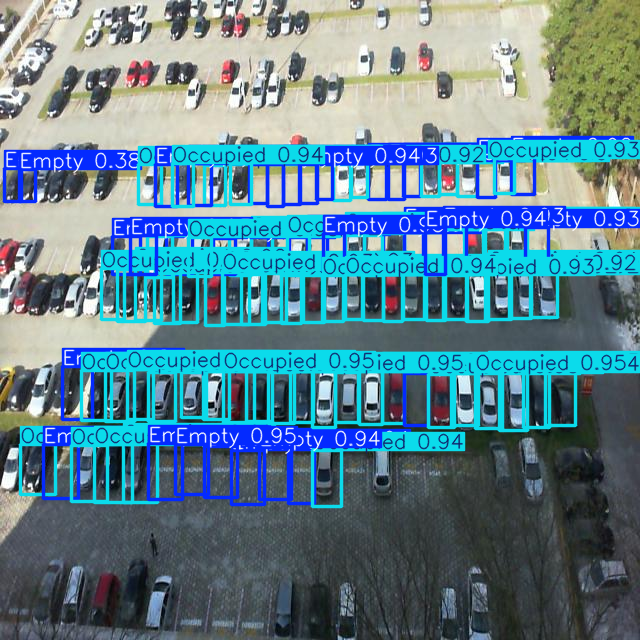

In [ ]:
t2 = model("/content/val/images/2012-09-11_15_27_08.jpg")

for result in t2:
    result.show()

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

Export model to ncnn format.

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/best_yolo_model.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.3 MB)

TorchScript: starting export with torch 2.5.1+cu124...
TorchScript: export success ✅ 2.6s, saved as '/content/best_yolo_model.torchscript' (10.4 MB)

NCNN: starting export with NCNN 1.0.20241226...
NCNN: running '/usr/local/lib/python3.11/dist-packages/ultralytics/pnnx /content/best_yolo_model.torchscript ncnnparam=/content/best_yolo_model_ncnn_model/model.ncnn.param ncnnbin=/content/best_yolo_model_ncnn_model/model.ncnn.bin ncnnpy=/content/best_yolo_model_ncnn_model/model_ncnn.py pnnxparam=/content/best_yolo_model_ncnn_model/model.pnnx.param pnnxbin=/content/best_yolo_model_ncnn_model/model.pnnx.bin pnnxpy=/content/best_yolo_model_ncnn_model/model_pnnx.py pnnxonnx=/content/best_yolo_model_ncn

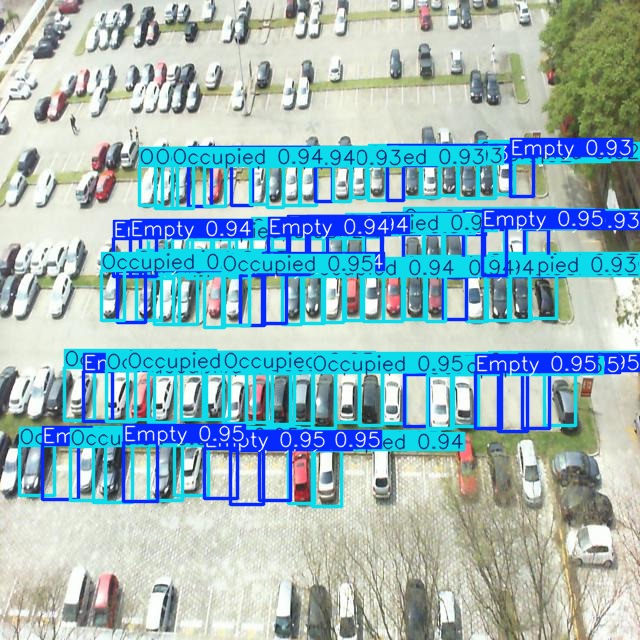

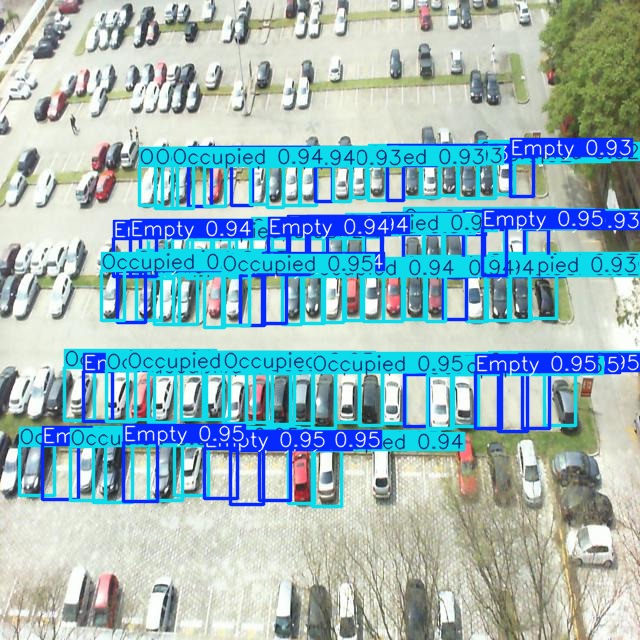

In [8]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("/content/best_yolo_model.pt")

# Export the model to NCNN format
model.export(format="ncnn", task="detect")  # creates '/yolo11n_ncnn_model'

# Load the exported NCNN model
ncnn_model = YOLO("/content/best_yolo_model.torchscript")

# Run inference
results = ncnn_model("/content/2012-09-12_11_50_46.jpg")

t2 = model("/content/2012-09-12_11_50_46.jpg")

for result in results:
    result.show()

for t in t2:
    t.show()

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /content/best_yolo_model_ncnn_model for NCNN inference...

image 1/1 /content/2012-09-12_11_50_46.jpg: 640x640 29 Emptys, 71 Occupieds, 151.5ms
Speed: 9.1ms preprocess, 151.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


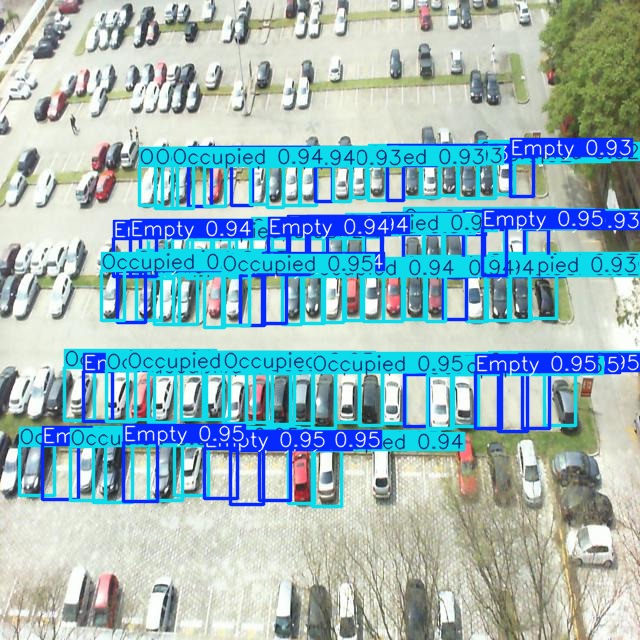

In [10]:
ncnn_model = YOLO("/content/best_yolo_model_ncnn_model")

res=ncnn_model("/content/2012-09-12_11_50_46.jpg")

for r in res:
    r.show()